In [10]:
import xarray as xr
import numpy as np
import rioxarray  # Import rioxarray for GeoTIFF export
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [12]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.ACCESS-CM2.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01A_100F_hot_day_counts_2015-2044.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

C:\Users\Ben\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Ben\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Ben\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


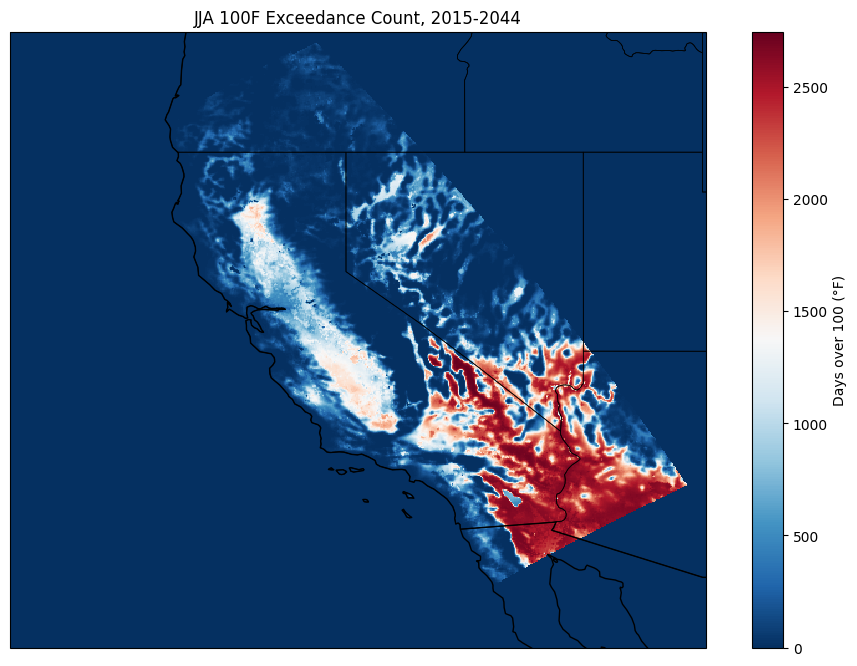

In [28]:
def map_100F(netcdf_file, variable_name="tasmax", projection=ccrs.PlateCarree(), cmap='RdBu_r'):
    """
    Creates a map of the 100F Exceedance Counts from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the 100F counts.
        variable_name (str): Name of the variable to plot. Defaults to "tasmax".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, cbar_kwargs={'label': 'Days over 100 (°F)'})

        plt.title("JJA 100F Exceedance Count, 2015-2044")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_EXHEAT_01A_100F_hot_day_counts_2015-2044.nc"  # Path to the NetCDF file with the tasmax difference

map_100F(netcdf_file_path)

In [22]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2045-2074 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.ACCESS-CM2.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01B_100F_hot_day_counts_2045-2074.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


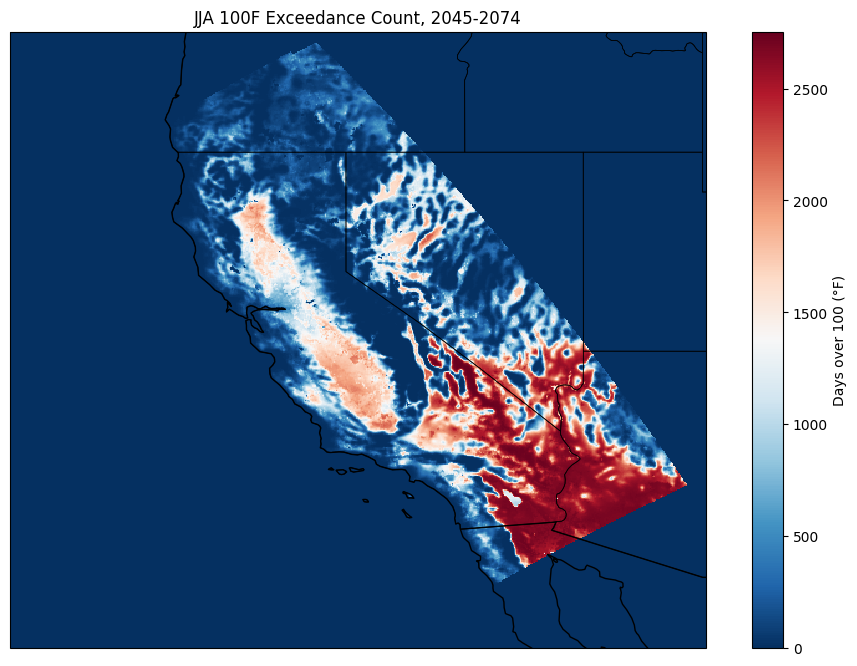

In [26]:
def map_100F(netcdf_file, variable_name="tasmax", projection=ccrs.PlateCarree(), cmap='RdBu_r'):
    """
    Creates a map of the 100F Exceedance Counts from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the 100F counts.
        variable_name (str): Name of the variable to plot. Defaults to "tasmax".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, cbar_kwargs={'label': 'Days over 100 (°F)'})

        plt.title("JJA 100F Exceedance Count, 2045-2074")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_EXHEAT_01B_100F_hot_day_counts_2045-2074.nc"  # Path to the NetCDF file with the tasmax difference

map_100F(netcdf_file_path)